In [63]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import pickle
import warnings
warnings.filterwarnings('ignore')

## **Read Data from csv**

In [64]:
cancer_df = pd.read_csv('data.csv')
cancer_df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


## **Shape of Our Dataset**

In [65]:
cancer_df.shape

(590, 14)

## **Check Correlation :**

<AxesSubplot:>

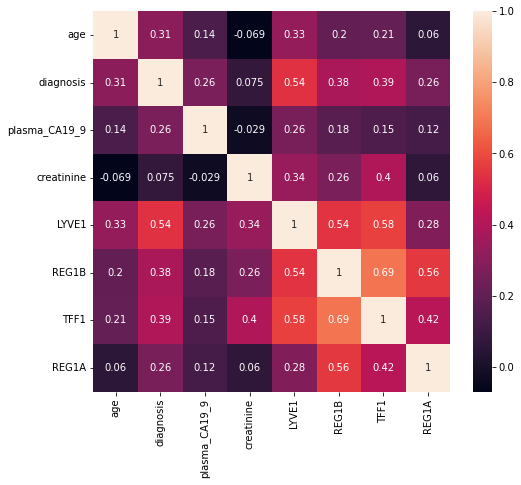

In [66]:
plt.figure(figsize=(8,7))
sns.heatmap(cancer_df.corr(),annot=True)

### **Columns in Our Dataset**

In [67]:
cancer_df.columns

Index(['sample_id', 'patient_cohort', 'sample_origin', 'age', 'sex',
       'diagnosis', 'stage', 'benign_sample_diagnosis', 'plasma_CA19_9',
       'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A'],
      dtype='object')

## **Drop Unwanted Columns**

In [68]:
cancer_df.drop(['sample_id','sample_origin','benign_sample_diagnosis','stage','patient_cohort'],axis=1,inplace=True)
cancer_df.head()

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,33,F,1,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,81,F,1,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,51,M,1,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,61,M,1,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,62,M,1,9.0,0.21489,0.000860,65.54000,41.088000,NaN


## **Handle Missing Values**

In [69]:
cancer_df.isnull().sum()

age                0
sex                0
diagnosis          0
plasma_CA19_9    240
creatinine         0
LYVE1              0
REG1B              0
TFF1               0
REG1A            284
dtype: int64

## **Inference**
## Stage,plasma and REG1A have null values present.

In [70]:
cancer_df.plasma_CA19_9 = cancer_df.plasma_CA19_9.fillna(cancer_df.plasma_CA19_9.mean())
cancer_df.REG1A = cancer_df.REG1A.fillna(cancer_df.REG1A.mean())

# **Data Visualization**

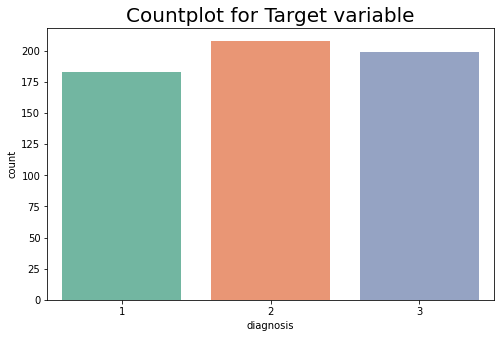

In [71]:
# 1 - no pancreatic disease
# 2 - benign
# 3 - pancreatic cancer
plt.figure(figsize=(8,5))
sns.countplot(x='diagnosis',data=cancer_df,palette='Set2');
plt.title("Countplot for Target variable",{'fontsize':20});

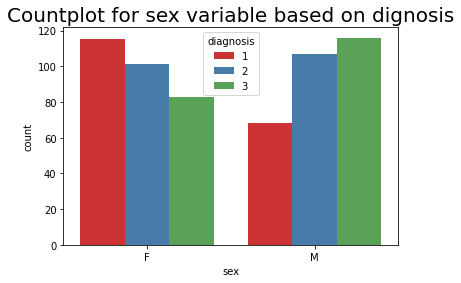

In [72]:
sns.countplot(x='sex',data=cancer_df,hue='diagnosis',palette='Set1');
plt.title("Countplot for sex variable based on dignosis",{'fontsize':20});

## **Inference**
## There are more male patients than females.

In [73]:
cancer_df.head()

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,33,F,1,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000
1,81,F,1,654.002944,0.97266,2.037585,94.46703,209.488250,228.407000
2,51,M,1,7.000000,0.78039,0.145589,102.36600,461.141000,735.281222
3,61,M,1,8.000000,0.70122,0.002805,60.57900,142.950000,735.281222
4,62,M,1,9.000000,0.21489,0.000860,65.54000,41.088000,735.281222


## **Boxplot for Other features**

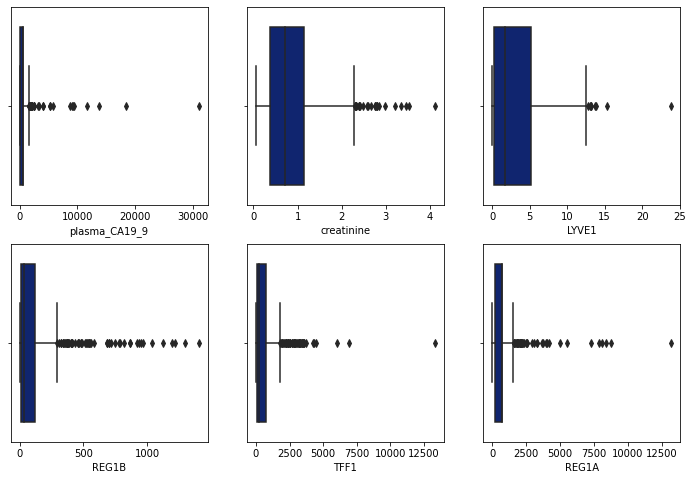

In [74]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharey=True)
sns.boxplot(ax=axes[0][0],x="plasma_CA19_9", data=cancer_df,palette='dark')
sns.boxplot(ax=axes[0][1],x="creatinine", data=cancer_df,palette='dark')
sns.boxplot(ax=axes[0][2],x="LYVE1", data=cancer_df,palette='dark')
sns.boxplot(ax=axes[1][0],x="REG1B", data=cancer_df,palette='dark')
sns.boxplot(ax=axes[1][1],x="TFF1", data=cancer_df,palette='dark')
sns.boxplot(ax=axes[1][2],x="REG1A", data=cancer_df,palette='dark');

Text(0.5, 1.0, 'Distibution of feature age')

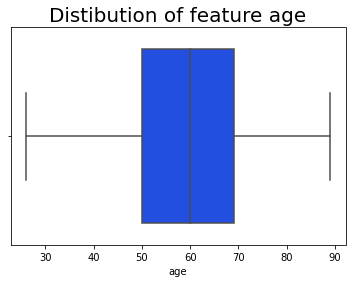

In [75]:
sns.boxplot(x='age',data=cancer_df,palette='bright');
plt.title("Distibution of feature age",{'fontsize':20})

## **Split Data into dependent and independent feature**

In [76]:
X = cancer_df.drop('diagnosis',axis=1)
y = cancer_df.diagnosis

### **Find how many categories are present in categorical variables**

In [77]:
for i in X.columns:
    if X[i].dtype == 'O':
        print(f"{i} : ",X[i].unique())

sex :  ['F' 'M']


## **Normalization**

In [78]:
encoder1=LabelEncoder()
X.sex = encoder1.fit_transform(X.sex)

In [79]:
output1 = open('sex_lbl.pkl', 'wb')
pickle.dump(encoder1, output1)
output1.close()

In [80]:
def fun(df):
    if df==1:
        return 0
    if df==2:
        return 1
    else:
        return 2
y = y.apply(fun)

## **Split data int two subsets: training data and testing data**

### To get a good prediction, divide the data into training and testing data, it is because as the name suggests you will train few data points and test few data points, and keep on doing that unless you get good results.

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=11)

## Shape of train and test data

In [82]:
print(X_train.shape,X_test.shape)

(442, 8) (148, 8)


## **Model Building**

In [83]:
models = list()
accuracy = list()

### **Hyperparameter tuning :**
### The goal of hyperparameter tuning is to find best combination of hyperparametrs that minimize the loss function and gives better result.

## **1] Random Forest**

In [84]:
rf  = RandomForestClassifier(random_state=43)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=43),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [85]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [86]:
new_rf = RandomForestClassifier(criterion='entropy',max_depth=8,n_estimators=240)
new_rf.fit(X_train,y_train)
models.append("Random Forest")
accuracy.append(abs(new_rf.score(X_test,y_test)))

In [87]:
ypred1 = new_rf.predict(X_test)
print("Classification Report for Random Forest")
print(classification_report(y_test,ypred1))

Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.62      0.61      0.62        41
           1       0.63      0.66      0.64        58
           2       0.79      0.78      0.78        49

    accuracy                           0.68       148
   macro avg       0.68      0.68      0.68       148
weighted avg       0.68      0.68      0.68       148



## **2] Support vector machine**

In [88]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.337 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.348 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.341 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.341 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.341 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.337 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.348 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.341 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.352 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.341 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.337 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [89]:
grid.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [90]:
s = SVC(C=10,gamma=0.0001,kernel='rbf')
s.fit(X_train,y_train)
models.append("SVM")
accuracy.append(abs(s.score(X_test,y_test)))

In [91]:
ypred2 = s.predict(X_test)
print("Classification Report SVM")
print(classification_report(y_test,ypred2))

Classification Report SVM
              precision    recall  f1-score   support

           0       0.62      0.59      0.60        41
           1       0.57      0.55      0.56        58
           2       0.70      0.76      0.73        49

    accuracy                           0.63       148
   macro avg       0.63      0.63      0.63       148
weighted avg       0.63      0.63      0.63       148



## **3] Logistic Regression**

In [92]:
logreg=LogisticRegression(max_iter=3500,penalty='l2')
logreg.fit(X_train,y_train)
models.append("Logistic Regression")
accuracy.append(abs(logreg.score(X_test,y_test)))

In [93]:
ypred3 = logreg.predict(X_test)
print("Classification Report Logistic Regression")
print(classification_report(y_test,ypred3))

Classification Report Logistic Regression
              precision    recall  f1-score   support

           0       0.53      0.76      0.62        41
           1       0.60      0.48      0.53        58
           2       0.74      0.63      0.68        49

    accuracy                           0.61       148
   macro avg       0.62      0.62      0.61       148
weighted avg       0.62      0.61      0.61       148



## **4] Dicision Tree**

In [94]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
models.append("Decision Tree")
accuracy.append(abs(dt.score(X_test,y_test)))

In [95]:
ypred4 = dt.predict(X_test)
print("Classification Report Dicision Tree")
print(classification_report(y_test,ypred4))

Classification Report Dicision Tree
              precision    recall  f1-score   support

           0       0.60      0.68      0.64        41
           1       0.62      0.52      0.57        58
           2       0.74      0.80      0.76        49

    accuracy                           0.66       148
   macro avg       0.65      0.67      0.66       148
weighted avg       0.65      0.66      0.65       148



## **Accuracy of models**

Text(0.5, 1.0, 'Accuracy of models')

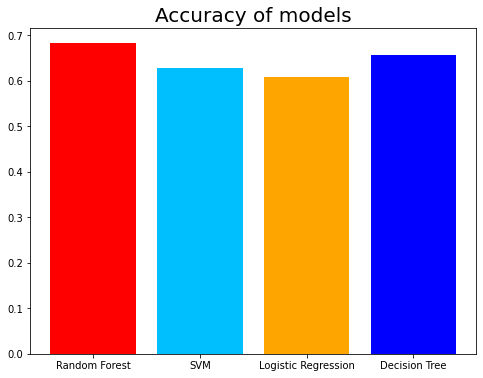

In [96]:
plt.figure(figsize=(8,6))
plt.bar(models,accuracy,color=['red','deepskyblue','orange','blue']);
plt.title("Accuracy of models",{'fontsize':20})

## **Save Model**

In [100]:
with open('model.pkl','wb') as f:
    pickle.dump(new_rf,f)